In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
data = pd.read_csv("UniversalBank.csv") 

In [118]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [119]:
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


Odrzucenie kolumn, które napewno nie będą potrzebne i wyświetlenie podstawowych informacji

In [120]:
data.drop(["ID","ZIP Code"],axis=1,inplace=True)

In [121]:
print("Liczba atrybutów: " + str(data.shape[1]))
print("Liczba obiektów: " + str(data.shape[0]))
print("Ile brakujących elementów: " + str(data.isnull().sum(axis=0).sum()))
print("Ile obiektów z brakującymi elementami: " + str(data.shape[0] - data.dropna(how='any').shape[0]))
print("Liczba braków poszczególynch atrybutów: " + str(np.asarray(data.isnull().sum(axis=0))))


Liczba atrybutów: 11
Liczba obiektów: 5000
Ile brakujących elementów: 0
Ile obiektów z brakującymi elementami: 0
Liczba braków poszczególynch atrybutów: [0 0 0 0 0 0 0 0 0 0 0]


Przesunięcie kolumny Personl Loan na ostatnie miejsce:

In [123]:
col_list = list(data)
col_list[6], col_list[10] = col_list[10], col_list[6]
data.columns = col_list
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,CreditCard,Securities Account,CD Account,Online,Personal Loan
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


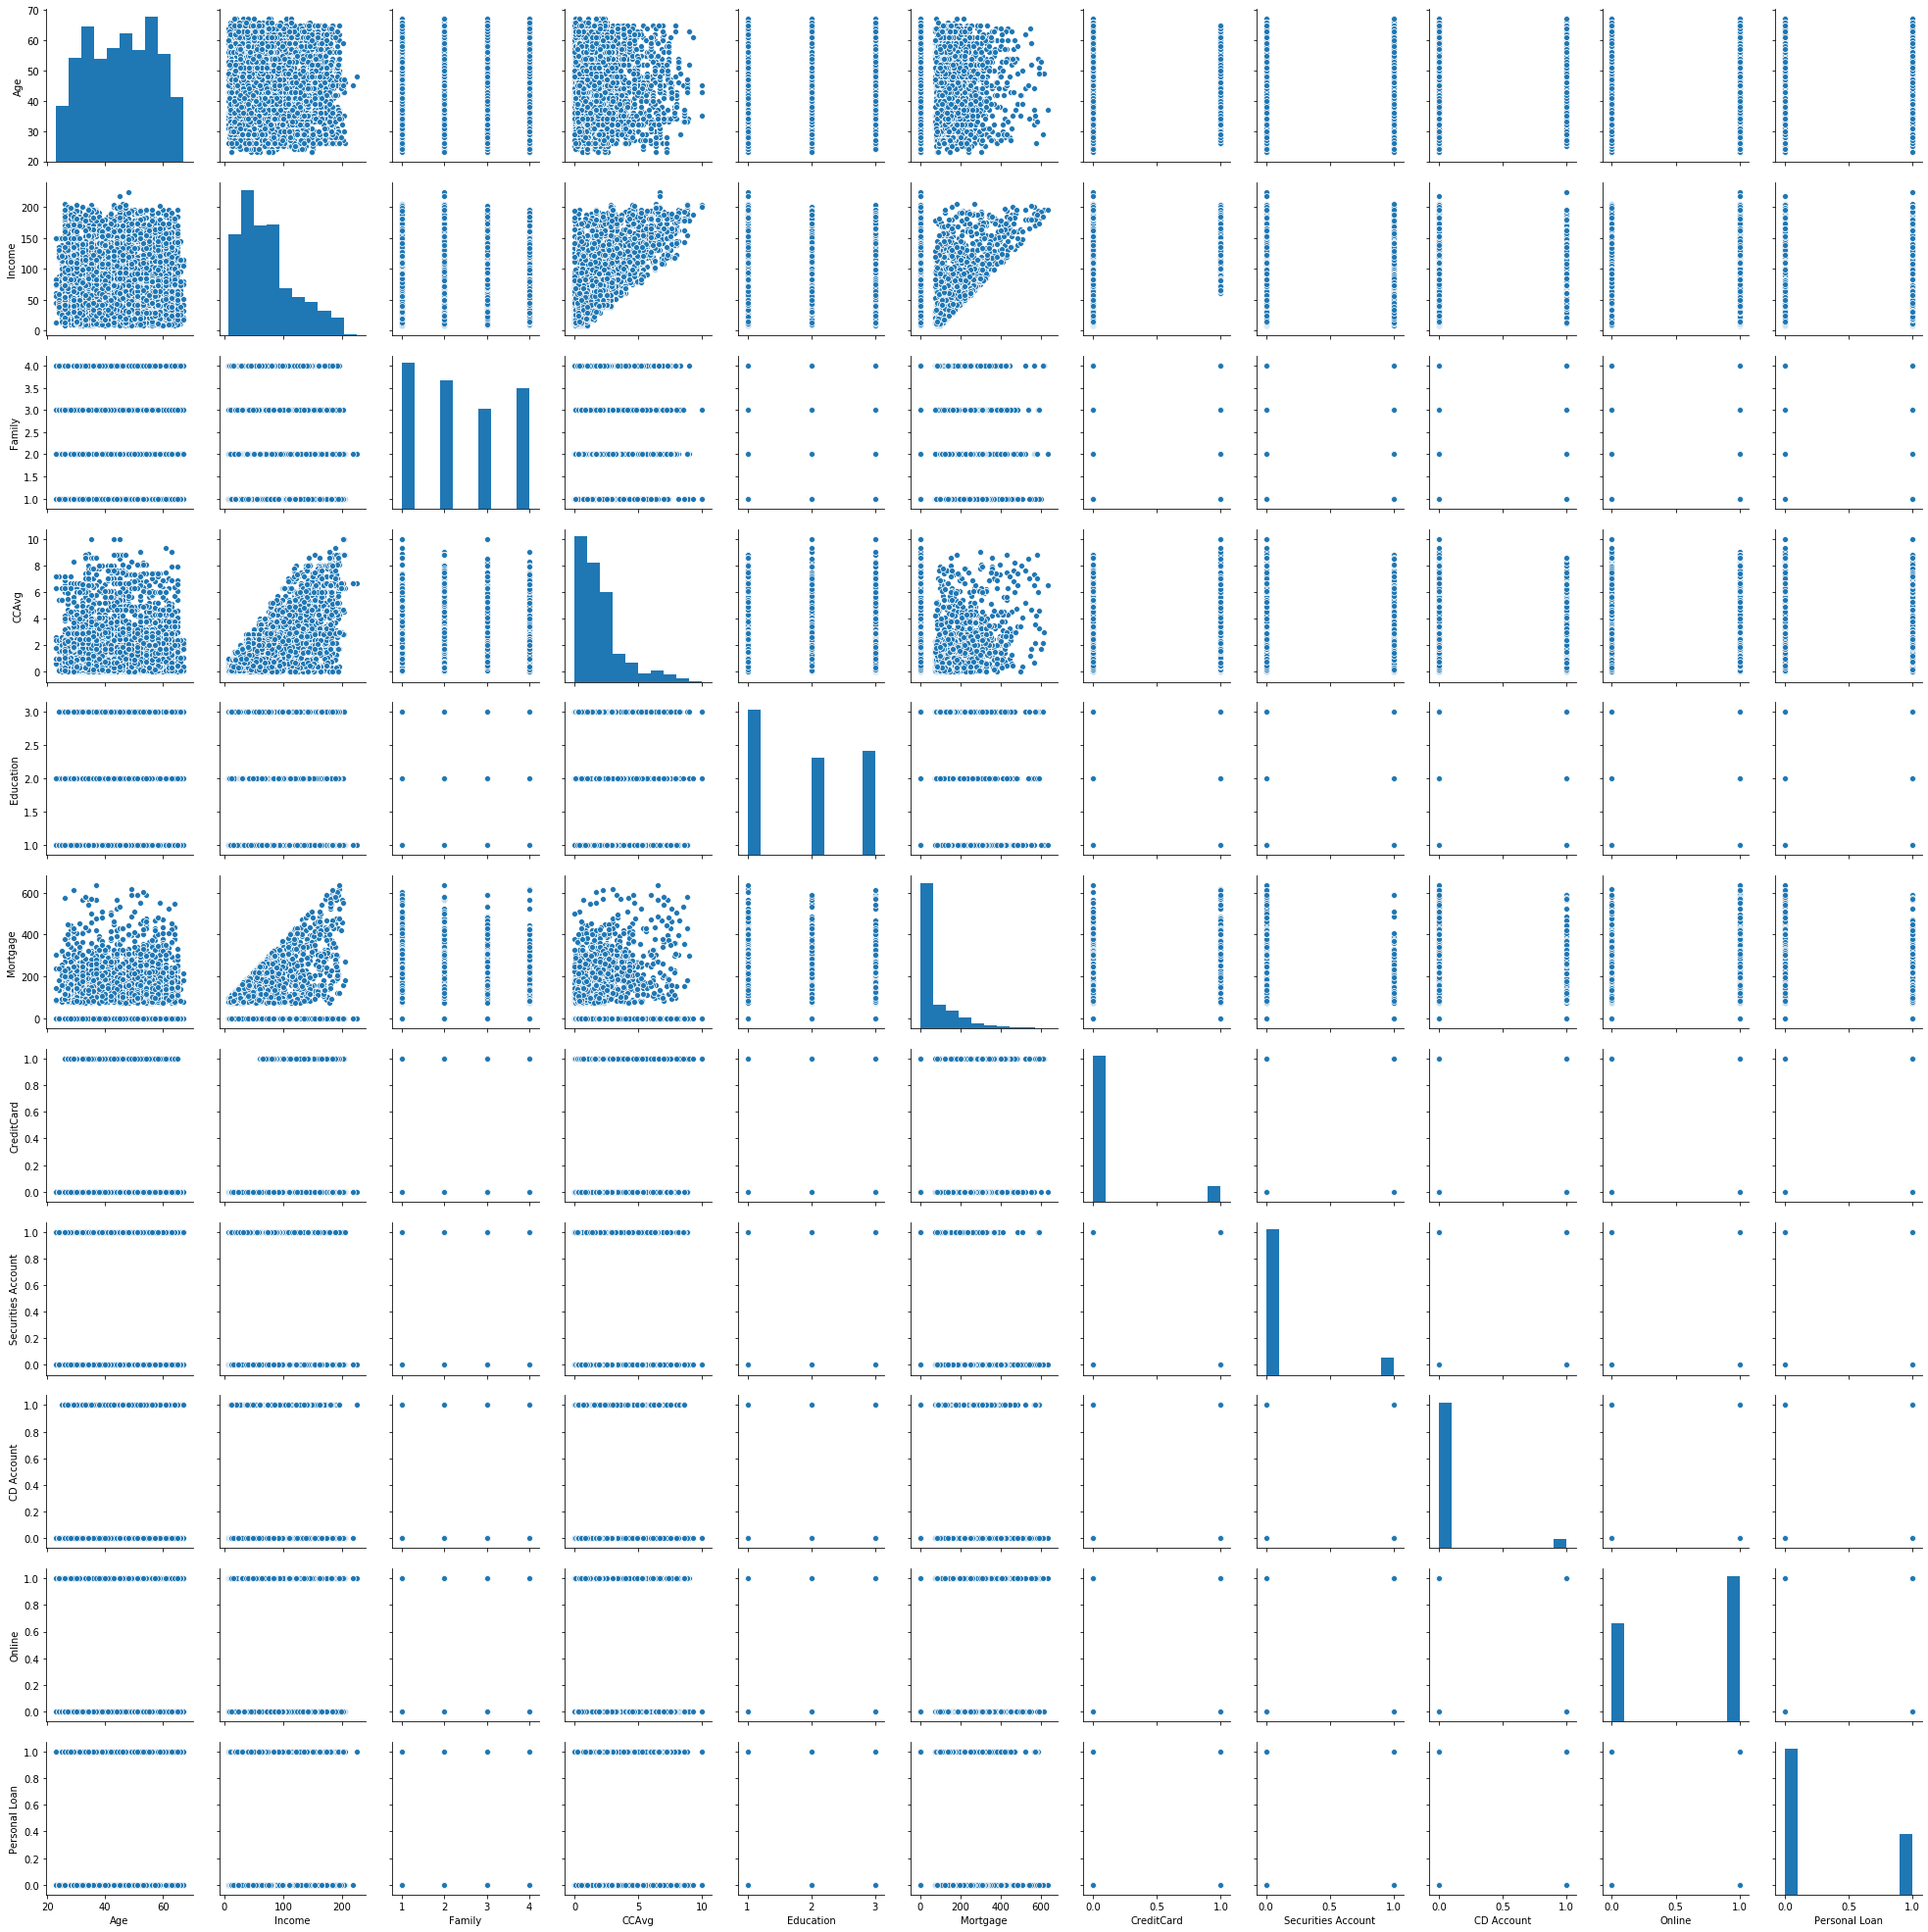

In [124]:
sns.pairplot(data, kind="scatter")
plt.show()

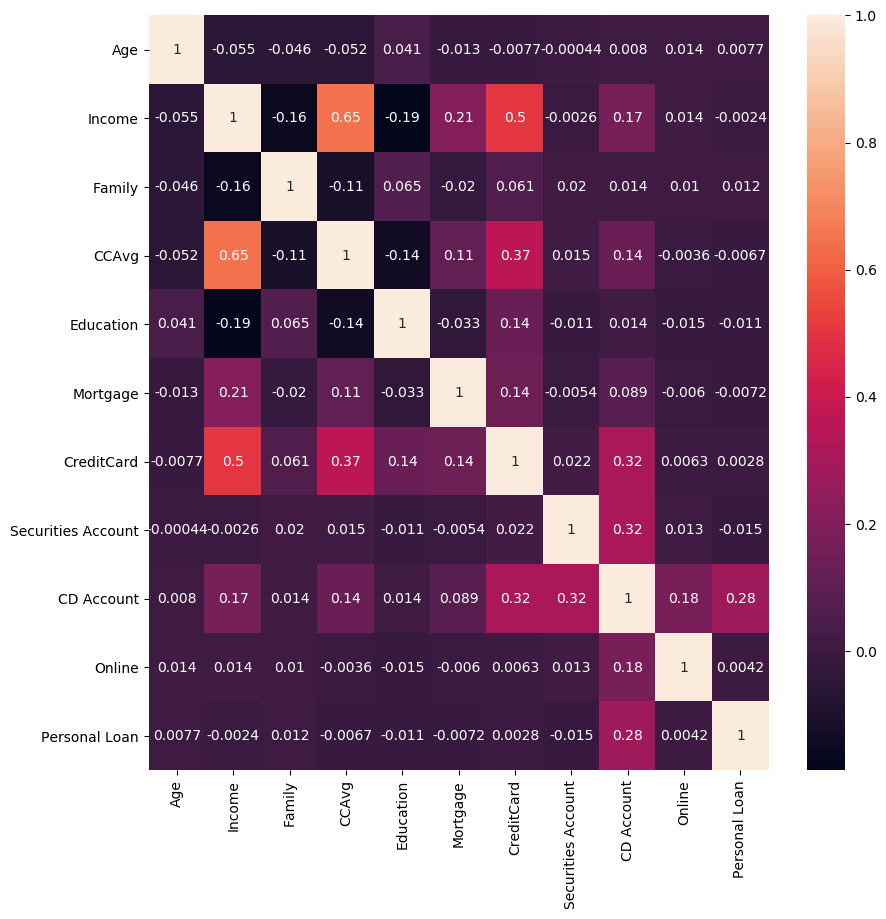

In [125]:
plt.figure(figsize=(10,10),dpi = 100)
corr = data.corr()
sns.heatmap(corr, annot=corr)

In [126]:
print("Ile obiektów względem wydania kredytu [0 1] - " + str(np.asarray(data.groupby('Personal Loan').Age.count())))

Ile obiektów względem wydania kredytu [0 1] - [3530 1470]
